### Define Dependencies and Setup

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import numpy as np
import quandl
import geopandas as gpd
import re
import time
import config

### Define area of interest (City of Seattle) zipcodes

In [3]:
seattlezips = ['98101', '98102', '98103', '98104', '98105', '98106', '98107', '98108', \
               '98109', '98112', '98115', '98116', '98117', '98118', '98119', '98121', \
               '98122', '98125', '98126', '98133', '98134', '98136', '98144', '98146', 
               '98154', '98164', '98174', '98177', '98178', '98195', '98199']

### Store CSV into DataFrame

In [4]:
csv_file = "data/Public_Schools.csv"
public_schools_df = pd.read_csv(csv_file)
public_schools_df.head()

,X,Y,OBJECTID,TYPE,SCHOOL,ADDRESS,SE_ANNO_CAD_DATA,NAME,GRADE,CITY,ZIP,PHONE,WEBSITE,XCOORD,YCOORD,SITE_USE,PRJ_ENRLLMNT
0,-122.295913,47.538091,1,Service School,VAN ASSELT ELEM,7201 Beacon Ave. S,NaN,Early Learning Center,PK,Seattle,98108,(206) 252-7500,https://www.seattleschools.org/cms/one.aspx?pa...,1279167.860,199712.3901,Active,NaN
1,-122.353265,47.632023,2,NonStandard,QUEEN ANNE GYM,1431 2nd Ave N,NaN,Queen Anne Gym,12-Sep,Seattle,98109,NaN,NaN,1265680.674,234243.2912,Active,NaN
2,-122.391520,47.673632,3,Elementary,ADAMS ELEM,6110 28th Ave. NW,NaN,Adams,K-5,Seattle,98107,(206) 252-1300,http://adamses.seattleschools.org/,1256557.700,249606.4799,Active,NaN
3,-122.281980,47.546322,4,Middle School,AKI KUROSE,3928 S Graham St.,NaN,Aki Kurose,8-Jun,Seattle,98118,(206) 252-7700,http://kurosems.seattleschools.org/,1282665.250,202649.1601,Active,NaN
4,-122.407827,47.577142,5,Elementary,ALKI ELEM,3010 59th Ave. SW,NaN,Alki,K-5,Seattle,98116,(206) 252-9050,http://alkies.seattleschools.org/,1251820.840,214499.2499,Active,NaN


### Create new data with select columns

In [5]:
# Create a filtered dataframe from specific columns
pub_school_cols = ["X", "Y", "OBJECTID", "ADDRESS", "CITY", "ZIP"]
pub_schools_transformed= public_schools_df[pub_school_cols].copy()

# Rename the column headers
pub_schools_transformed = pub_schools_transformed.rename(columns={"X": "Longitude",
                                                                  "Y": "Latitude", 
                                                                  "OBJECTID": "ID",
                                                                  "ADDRESS": "Address",
                                                                  "CITY": "City",      
                                                                  "ZIP": "Zip"})

# Clean the data by dropping duplicates and setting the index
pub_schools_transformed.drop_duplicates("ID", inplace=True)
pub_schools_transformed.set_index("ID", inplace=True)

pub_schools_transformed.head()

,Longitude,Latitude,Address,City,Zip
ID,,,,,
1,-122.295913,47.538091,7201 Beacon Ave. S,Seattle,98108
2,-122.353265,47.632023,1431 2nd Ave N,Seattle,98109
3,-122.391520,47.673632,6110 28th Ave. NW,Seattle,98107
4,-122.281980,47.546322,3928 S Graham St.,Seattle,98118
5,-122.407827,47.577142,3010 59th Ave. SW,Seattle,98116


### Store CSV into DataFrame

In [6]:

csv_file = "data/Private_Schools.csv"
private_schools_df = pd.read_csv(csv_file)
private_schools_df.head()

,X,Y,OBJECTID,NAME,ADDRESS,PHONE,WEBSITE,GRADE,CITY,ZIP
0,-122.313684,47.665678,1,Academy for Precision Learning,5031 University Way NE,206.427.0115,www.aplschool.org,K-12,Seattle,98105-4341
1,-122.360490,47.638569,2,Alcuin School,216 W Boston,206.286.0771,www.alcuinschool.com,P-1,Seattle,98119-2641
2,-122.269651,47.527028,3,Alfajer School,8430 Rainier Ave S,206.747.9036,NaN,K-12,Seattle,98118-4655
3,-122.259757,47.510871,4,Amazing Grace Christian School,10056 Renton Ave S,206.723.5526,www.agcschool.org,K-2,Seattle,98178-2255
4,-122.292839,47.674853,5,Assumption St. Bridget School,6220 32nd Ave NE,206.524.7452,www.asbschool.org,P-8,Seattle,98115-7233



### Create new data with select columns


In [7]:
# Create a filtered dataframe from specific columns
prvt_school_cols = ["X", "Y", "OBJECTID", "ADDRESS", "CITY", "ZIP"]
prvt_schools_transformed= private_schools_df[prvt_school_cols].copy()

# Rename the column headers
prvt_schools_transformed = prvt_schools_transformed.rename(columns={"X": "Longitude",
                                                                    "Y": "Latitude", 
                                                                    "OBJECTID": "ID",
                                                                    "ADDRESS": "Address",
                                                                    "CITY": "City",      
                                                                    "ZIP": "Zip"})

# Clean the data by dropping duplicates and setting the index
prvt_schools_transformed.drop_duplicates("ID", inplace=True)
prvt_schools_transformed.set_index("ID", inplace=True)

prvt_schools_transformed.head()

,Longitude,Latitude,Address,City,Zip
ID,,,,,
1,-122.313684,47.665678,5031 University Way NE,Seattle,98105-4341
2,-122.360490,47.638569,216 W Boston,Seattle,98119-2641
3,-122.269651,47.527028,8430 Rainier Ave S,Seattle,98118-4655
4,-122.259757,47.510871,10056 Renton Ave S,Seattle,98178-2255
5,-122.292839,47.674853,6220 32nd Ave NE,Seattle,98115-7233


### Read into variables information from  Seattle.gov open data portal

In [8]:
seattle_king_county_geo = gpd.read_file('Zip_Codes.geojson')
seattle_city_geo = seattle_king_county_geo[seattle_king_county_geo['ZIPCODE'].isin(seattlezips)]

seattle_public_schools_geo = gpd.read_file('Public_Schools.geojson')
seattle_private_schools_geo = gpd.read_file('Private_Schools.geojson')


### Create Connection String  and setting up database engine

In [ ]:
rds_connection_string = "postgres:postgres@localhost:5432/ETL_Homework"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [ ]:
public_schools.to_sql(name='staging_public_schools', con=engine, if_exists='append', index=False)

In [ ]:
private_schools.to_sql(name='staging_private_schools', con=engine, if_exists='append', index=False)

In [ ]:
zillow_data.to_sql(name='staging_zillow_data', con=engine, if_exists='append', index=False)

### Parse ZILLOW Metadata from Quandl to select varibles of interest

In [9]:
data = []
metadata = {}
with open('ZILLOW_metadata.csv') as fp:
    for line in fp:
        line = line.rstrip('\n')
        if re.search(r'^Z98',line):
            for z in seattlezips:
                regex = re.compile(f'Z{z}_MLPFAH|Z{z}_MVALFAH|Z{z}_ZHVIAH')
                m = regex.match(line)
                if m:
                    data.append(m.group())
                    metadata[m.group()] = line.split(',')

### Call Quandl API for selected variables

In [10]:
quandl.ApiConfig.api_key = "z4txEPd8aUpZ3ABZzCcy"

MLPFAH_label = 'Median Listing Price Per Square Foot - All Homes'
MVALFAH_label = 'Median Value Per Square Foot - All Homes'
ZHVIAH_label = 'Zillow Home Value Index - All Homes'
zillow_data = pd.DataFrame()

i = 0

for d in data:
    try:
        z, x = d.split("_")
        #print(f'{z[1:]}, {x}')
        delay_time = np.random.uniform(0,0.2)
        time.sleep(delay_time)
        tmp = quandl.get(f'ZILLOW/{d}',start_date='2018-04-30', end_date='2019-04-30')
        tmp['ZIPCODE'] = z[1:]
        tmp['INDICATOR'] = x
        tmp.reset_index(inplace=True)
        #print(tmp.head())
        zillow_data = zillow_data.append(tmp, ignore_index=True)
        #i = i + 1
        if i > 50:
            break
    except:
        print(f'{z} failed')
        next

In [12]:
zillow_data.tail()

,Date,Value,ZIPCODE,INDICATOR
1009,2018-12-31,929000.0,98199,ZHVIAH
1010,2019-01-31,932300.0,98199,ZHVIAH
1011,2019-02-28,934000.0,98199,ZHVIAH
1012,2019-03-31,934500.0,98199,ZHVIAH
1013,2019-04-30,931300.0,98199,ZHVIAH


### Save extracted data

In [13]:
zillow_data.to_csv('zillow_data.csv', index=False)

### Some basic analysis to verify that the data looks right

In [14]:
zillow_grouped = zillow_data.groupby(['ZIPCODE','INDICATOR']).median()
zillow_grouped.head()

Value
ZIPCODE INDICATOR               
98101   MLPFAH        837.995338
        MVALFAH       774.000000
        ZHVIAH     624900.000000
98102   MLPFAH        648.508431
        MVALFAH       663.000000

### Creating Bar chart with  indicators

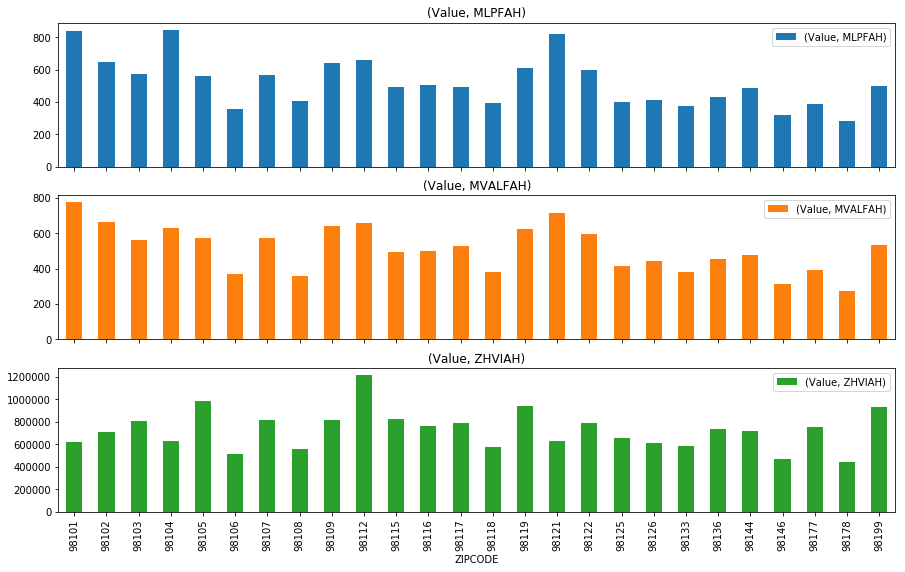

In [15]:
zillow_grouped.unstack(level=1).plot(kind='bar', subplots=True, figsize=(15,9));

In [16]:
seattle_city_geo.head()

,OBJECTID,ZIP,ZIPCODE,COUNTY,SHAPE_Length,SHAPE_Area,geometry
58,59,98101,98101,033,34632.584473,2.458772e+07,POLYGON ((-122.3300154794659 47.61843728467148...
59,60,98102,98102,033,37488.780105,4.322189e+07,POLYGON ((-122.3159301696644 47.64951306373531...
60,61,98103,98103,033,71421.212504,1.440083e+08,POLYGON ((-122.3284983624493 47.70111708599151...
61,62,98104,98104,033,43354.179793,3.880558e+07,POLYGON ((-122.3222046332107 47.61204519175887...
62,63,98105,98105,033,82483.975807,1.504377e+08,"POLYGON ((-122.309777115396 47.67381195228112,..."


### Creating map with plotted schools 

In [17]:
zhviah = zillow_grouped.xs('ZHVIAH', axis=0, level=1, drop_level=True)
mvalfah = zillow_grouped.xs('MVALFAH', axis=0, level=1, drop_level=True)
mlpfah = zillow_grouped.xs('MLPFAH', axis=0, level=1, drop_level=True)

In [18]:
plt.rcParams['figure.figsize'] = (8, 32)

In [19]:
seattle_city_geo = seattle_city_geo.merge(zhviah,left_on='ZIPCODE',right_on='ZIPCODE')
seattle_city_geo = seattle_city_geo.merge(mvalfah,left_on='ZIPCODE',right_on='ZIPCODE')
seattle_city_geo = seattle_city_geo.merge(mlpfah,left_on='ZIPCODE',right_on='ZIPCODE')

In [20]:
seattle_city_geo.columns = ['OBJECTID', 'ZIP', 'ZIPCODE', 'COUNTY', 'SHAPE_Length', 'SHAPE_Area',
       'geometry', 'ZHVIAH', 'MVALFAH', 'MLPFAH']

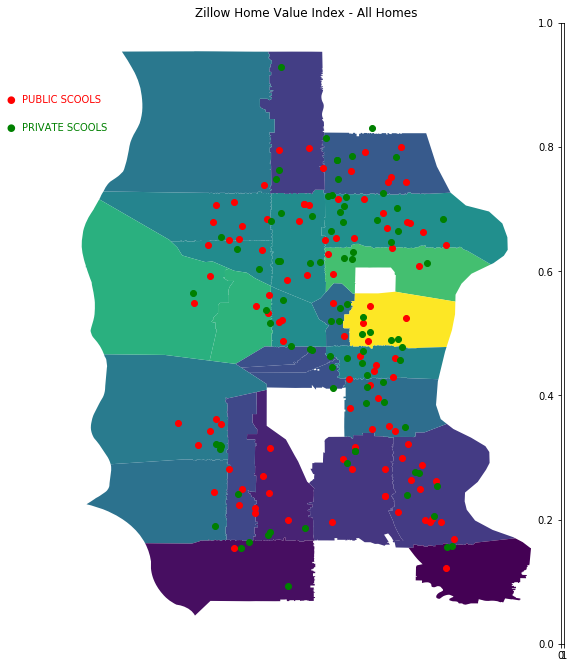

In [21]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1,1)
ax.set_title(ZHVIAH_label)
ax.text(-122.5,47.75,u'\u25CF  PUBLIC SCOOLS',color="red")
ax.text(-122.5,47.735,u'\u25CF  PRIVATE SCOOLS',color="green")
ax.axis("off")
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size=0.05, pad=0.1)
smap = seattle_city_geo.plot(column = "ZHVIAH", cmap=plt.cm.get_cmap("viridis"), ax = ax, legend = False)
seattle_public_schools_geo.plot(ax=smap, color="red")
seattle_private_schools_geo.plot(ax=smap, color="green")
plt.tight_layout();

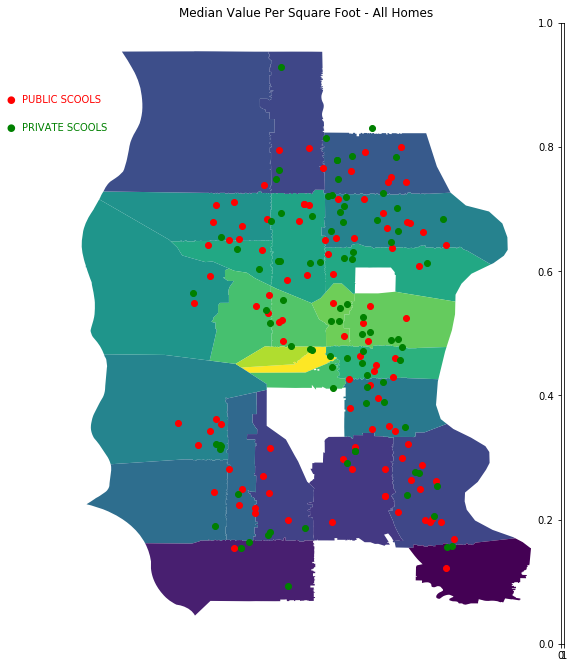

In [23]:

fig, ax = plt.subplots(1,1)
ax.set_title(MVALFAH_label)
ax.text(-122.5,47.75,u'\u25CF  PUBLIC SCOOLS',color='red')
ax.text(-122.5,47.735,u'\u25CF  PRIVATE SCOOLS',color='green')
ax.axis('off')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size=0.05, pad=0.1)
smap = seattle_city_geo.plot(column = 'MVALFAH', cmap=plt.cm.get_cmap('viridis'),\
                             ax = ax, legend = False, )
seattle_public_schools_geo.plot(ax=smap, color='red')
seattle_private_schools_geo.plot(ax=smap, color='green')
plt.tight_layout();

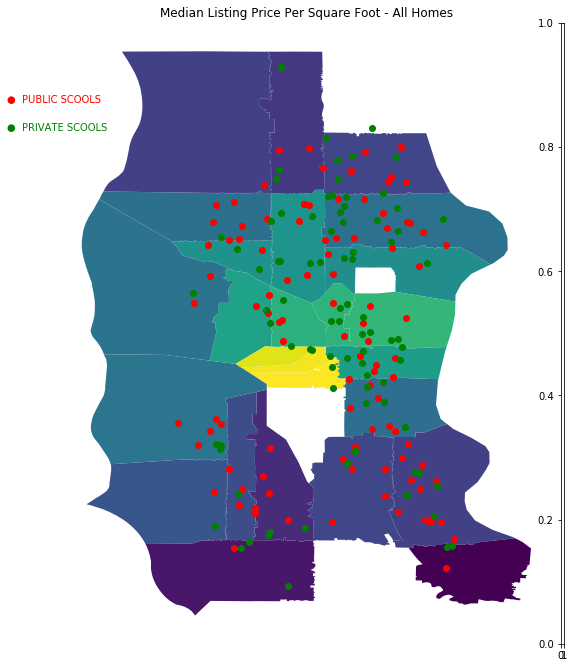

In [24]:
fig, ax = plt.subplots(1,1)
ax.set_title(MLPFAH_label)
ax.text(-122.5,47.75,u'\u25CF  PUBLIC SCOOLS',color='red')
ax.text(-122.5,47.735,u'\u25CF  PRIVATE SCOOLS',color='green')
ax.axis('off')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size=0.05, pad=0.1)
smap = seattle_city_geo.plot(column = 'MLPFAH', cmap=plt.cm.get_cmap('viridis'),\
                             ax = ax, legend = False)
seattle_public_schools_geo.plot(ax=smap, color='red')
seattle_private_schools_geo.plot(ax=smap, color='green')
plt.tight_layout();

In [25]:
public_schools = pd.read_csv('data/Public_Schools.csv')
private_schools = pd.read_csv('data/Private_Schools.csv')

# combine and keep the first instance of id
#schools_df = pd.concat([public_schools, private_schools], axis=0)

#schools_df.head()


In [26]:
#Create a map:
m = folium.Map([47.5, -122.5], zoom_start=12)

In [27]:
# mark each public school as a blue point
for i, row in public_schools.iterrows():
    folium.CircleMarker([row['Y'], row['X']],
                        radius=8,
                        popup=row['SCHOOL'],
                        fill_color="red", # School color
                       ).add_to(m)
    
    
    # mark each public school as a blue point
for j, row in private_schools.iterrows():
    folium.CircleMarker([row['Y'], row['X']],
                        radius=8,
                        popup=row['NAME'],
                        fill_color="green", # School color
                       ).add_to(m)

In [28]:
m